In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

flood_files = [f for f in os.listdir(r'D:\WORK\FLOODNET\NYC OEM Monthly') if f.endswith('.csv')]

flood_data = pd.DataFrame()
for flood_file in flood_files:
    temp = pd.read_csv(os.path.join(r'D:\WORK\FLOODNET\NYC OEM Monthly', flood_file))
    flood_data = pd.concat([flood_data, temp], axis=0)

flood_data.head()

,time,deployment_id,depth_filt_mm,depth_proc_mm
0,2020-11-01 00:01:57.475178+00:00,daily_new_falcon,0.0,0.0
1,2020-11-01 00:06:10.794507+00:00,daily_new_falcon,0.0,0.0
2,2020-11-01 00:10:24.127991+00:00,daily_new_falcon,0.0,0.0
3,2020-11-01 00:14:37.481077+00:00,daily_new_falcon,0.0,0.0
4,2020-11-01 00:18:50.847743+00:00,daily_new_falcon,0.0,0.0


In [2]:
flood_data['time'] = pd.to_datetime( flood_data['time'] )
flood_data.head()

,time,deployment_id,depth_filt_mm,depth_proc_mm
0,2020-11-01 00:01:57.475178+00:00,daily_new_falcon,0.0,0.0
1,2020-11-01 00:06:10.794507+00:00,daily_new_falcon,0.0,0.0
2,2020-11-01 00:10:24.127991+00:00,daily_new_falcon,0.0,0.0
3,2020-11-01 00:14:37.481077+00:00,daily_new_falcon,0.0,0.0
4,2020-11-01 00:18:50.847743+00:00,daily_new_falcon,0.0,0.0


In [3]:
# Red Hook Sensors.
path = r"D:\WORK\FLOODNET\Redhook_Sensors_2.csv"
redhook_sensors = pd.read_csv(path)
redhook_sensors = redhook_sensors[ redhook_sensors['Date Retired'] == '-' ]

# Drop empty columns
redhook_sensors = redhook_sensors.dropna(axis=1, how='all').rename(columns={'-': 'id'})
# Delete columsn after id
redhook_sensors = redhook_sensors.drop(redhook_sensors.columns[redhook_sensors.columns.get_loc('id')+1:], axis=1)

redhook_sensors.head()

,Sensor Name,Borough,Neighborhood,Precipitation Data Source,Tidal Data Source,Mounted Over,Mounted To,Date Deployed,Deployed by,Date Retired,Sensor Height Above Ground,id
0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,nyc-micronet-bknyrd,NaN,Sidewalk,Streetsign Post,"July 15, 2021",FloodNet,-,NaN,daily_gentle_beetle
2,BK - 9th St/Smith St,Brooklyn,Gowanus,nyc-micronet-bknyrd,noaa-tidal-8518750,Sidewalk,Streetsign Post,"December 14, 2021",FloodNet,-,NaN,overly_heroic_squid
3,BK - Carroll St/4th Av,Brooklyn,Gowanus,nyc-micronet-bknyrd,NaN,Sidewalk,Streetsign Post,"July 15, 2021",FloodNet,-,2700.0,weekly_poetic_guinea
4,BK - Columbia St/Bay St,Brooklyn,Red Hook,nyc-micronet-bknyrd,NaN,Sidewalk,Streetsign Post,"February 18, 2022",FloodNet,-,NaN,vastly_saving_whale
5,BK - Dwight St/King St,Brooklyn,Red Hook,nyc-micronet-bknyrd,NaN,Sidewalk,Streetsign Post,"February 18, 2022",FloodNet,-,NaN,openly_driven_tarpon


In [4]:
pd.set_option('display.max_columns', None)
all_sensors = r"D:\WORK\FLOODNET\Sensor Locations Directory (1).xlsx"
all_sensors = pd.read_excel(all_sensors, sheet_name='street sensors (live)')
all_sensors = all_sensors.drop(['nearest_weather_station','nearest_tidal_id','mounted_over','sensor_mount','date_deployed','date_down'], axis =1 )
all_sensors = all_sensors.drop(['height_ground_mm','B/e tag','deployed_by','Last Visit','Visit Notes','Plan notes','height_navd88_m','Last time FK received a message as of 6/16/2022','deploy_type','sensor_status','fk_status','Unnamed: 20','csv sent to FieldKit'], axis=1)
all_sensors = all_sensors[ all_sensors['deployment_id']!='-' ].copy()
print(all_sensors.shape[0])
all_sensors.head()

35


,sensor_display_name,sensor_address_borough,sensor_address_neighborhood,lat,lon,deployment_id,sensor_address_street
1,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,daily_gentle_beetle,Carroll & Garfield
2,BK - 9th St/Smith St (RETIRED),Brooklyn,Gowanus,40.673654,-73.995396,widely_proud_lizard,Smith & 9th
3,BK - 9th St/Smith St,Brooklyn,Gowanus,40.673401,-73.994892,overly_heroic_squid,Smith & 9th
4,BK - Carroll St/4th Av,Brooklyn,Gowanus,40.676281,-73.984089,weekly_poetic_guinea,Carroll & 4th
5,BK - Columbia St/Bay St,Brooklyn,Red Hook,40.673267,-74.008418,vastly_saving_whale,Bay & Columbia


In [5]:
path = r"C:\Git_Repo\FloodAnalysis\DATA\NYCDTA_flood_reports_detections_join.geojson"
import geopandas as gpd

cdta = gpd.read_file(path)

geo_sensors = gpd.GeoDataFrame( all_sensors, geometry=gpd.points_from_xy(all_sensors.lon, all_sensors.lat), crs='EPSG:4326' )
geo_sensors = geo_sensors[ ~geo_sensors['sensor_display_name'].str.contains('RET') ]
geo_sensors = geo_sensors.to_crs('EPSG:2263')

geo_sensors = geo_sensors.sjoin(cdta, how='inner')
geo_sensors.head(3)

,sensor_display_name,sensor_address_borough,sensor_address_neighborhood,lat,lon,deployment_id,sensor_address_street,geometry,index_right,BoroCode,BoroName,CountyFIPS,CDTA2020,CDTAName,CDTAType,Shape_Leng,Shape_Area,max_depth_max,max_depth_range,max_depth_sum,wet_day_co_max,wet_day_co_sum,globalid_count,recent_floods_count,reports_tot,Floodnet_FG_count,selected_cdta,label
1,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,daily_gentle_beetle,Carroll & Garfield,POINT (988703.714 185508.939),5,3,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1,1.0,82,7.0,0,Red Hook + Park Slope + Carroll Gardens
3,BK - 9th St/Smith St,Brooklyn,Gowanus,40.673401,-73.994892,overly_heroic_squid,Smith & 9th,POINT (985666.916 184614.590),5,3,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1,1.0,82,7.0,0,Red Hook + Park Slope + Carroll Gardens
4,BK - Carroll St/4th Av,Brooklyn,Gowanus,40.676281,-73.984089,weekly_poetic_guinea,Carroll & 4th,POINT (988663.509 185664.066),5,3,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1,1.0,82,7.0,0,Red Hook + Park Slope + Carroll Gardens


In [6]:
all_data = flood_data.join(geo_sensors.set_index('deployment_id'), on='deployment_id')
all_data.head()

,time,deployment_id,depth_filt_mm,depth_proc_mm,sensor_display_name,sensor_address_borough,sensor_address_neighborhood,lat,lon,sensor_address_street,geometry,index_right,BoroCode,BoroName,CountyFIPS,CDTA2020,CDTAName,CDTAType,Shape_Leng,Shape_Area,max_depth_max,max_depth_range,max_depth_sum,wet_day_co_max,wet_day_co_sum,globalid_count,recent_floods_count,reports_tot,Floodnet_FG_count,selected_cdta,label
0,2020-11-01 00:01:57.475178+00:00,daily_new_falcon,0.0,0.0,BK - Hoyt St/5th St,Brooklyn,Gowanus,40.676672,-73.994591,Hoyt & 5th,POINT (985750.351 185806.322),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens
1,2020-11-01 00:06:10.794507+00:00,daily_new_falcon,0.0,0.0,BK - Hoyt St/5th St,Brooklyn,Gowanus,40.676672,-73.994591,Hoyt & 5th,POINT (985750.351 185806.322),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens
2,2020-11-01 00:10:24.127991+00:00,daily_new_falcon,0.0,0.0,BK - Hoyt St/5th St,Brooklyn,Gowanus,40.676672,-73.994591,Hoyt & 5th,POINT (985750.351 185806.322),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens
3,2020-11-01 00:14:37.481077+00:00,daily_new_falcon,0.0,0.0,BK - Hoyt St/5th St,Brooklyn,Gowanus,40.676672,-73.994591,Hoyt & 5th,POINT (985750.351 185806.322),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens
4,2020-11-01 00:18:50.847743+00:00,daily_new_falcon,0.0,0.0,BK - Hoyt St/5th St,Brooklyn,Gowanus,40.676672,-73.994591,Hoyt & 5th,POINT (985750.351 185806.322),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens


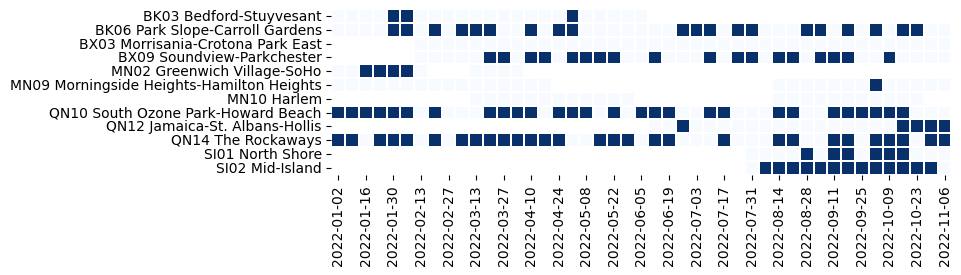

In [14]:
import numpy as np

filtered_data = pd.DataFrame()
for i,gr in all_data.groupby('deployment_id'):
    gr['smooth_depth_mm'] = gr['depth_proc_mm'].rolling(10,center=True).mean() 

    # if less then 4 consectuve values are more than 0, assign 0
    roll_window = 60
    gr['smooth_depth_mm'] = np.where( gr['smooth_depth_mm'].rolling(roll_window,center=True).sum() < roll_window, 0, gr['smooth_depth_mm'] )
    filtered_data = pd.concat( [filtered_data, gr] )

# # # Convert mm to inches
filtered_data['smooth_depth_in'] = filtered_data['smooth_depth_mm'] / 25.4

# ---- FORMAT & PLOT ----
filtered_data = filtered_data[ filtered_data['time'].dt.year > 2021 ]
filtered_data['smooth_depth_in'] = np.where( filtered_data['smooth_depth_in'] > 1 , 1, 0 )
pt = pd.pivot_table(
    data = filtered_data.sort_values('CDTAName'),
    columns = pd.Grouper(key='time', freq='1W'),
    index = 'CDTAName',
    values='smooth_depth_in',
    aggfunc='max'
)

pt.columns = pt.columns.strftime('%Y-%m-%d')
pt.index = [x.split(" (")[0] for x in pt.index]

import seaborn as sns
plt.figure( figsize=(8, 3) )
sns.heatmap(
    pt,
    cmap='Blues',
    mask=pt.isnull(),
    cbar=False,
    linewidths=0.1,
    linecolor='white',
    square=True
)
plt.xlabel('')
plt.ylabel('');

In [15]:
RH_data = filtered_data.dropna(subset=['CDTAName'],axis=0)
RH_data = RH_data[ RH_data['CDTAName'].str.contains("BK06") ]
RH_data.head()

,time,deployment_id,depth_filt_mm,depth_proc_mm,sensor_display_name,sensor_address_borough,sensor_address_neighborhood,lat,lon,sensor_address_street,geometry,index_right,BoroCode,BoroName,CountyFIPS,CDTA2020,CDTAName,CDTAType,Shape_Leng,Shape_Area,max_depth_max,max_depth_range,max_depth_sum,wet_day_co_max,wet_day_co_sum,globalid_count,recent_floods_count,reports_tot,Floodnet_FG_count,selected_cdta,label,smooth_depth_mm,smooth_depth_in
148,2022-10-01 00:08:33.836000+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,0.0,0
180,2022-10-01 00:10:40.240000+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,0.0,0
549,2022-10-01 00:33:47.206000+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,35.7,1
588,2022-10-01 00:35:52.940000+00:00,daily_gentle_beetle,0.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,154.2,1
3215,2022-10-01 03:23:50.762000+00:00,daily_gentle_beetle,1190.0,0.0,BK - 4th Av/Garfield Pl,Brooklyn,Gowanus,40.675855,-73.983944,Carroll & Garfield,POINT (988703.714 185508.939),5.0,3.0,Brooklyn,047,BK06,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,0,77350.580928,8.664108e+07,62.6,62.1,360.8,28.0,81.0,1.0,1.0,82.0,7.0,0.0,Red Hook + Park Slope + Carroll Gardens,273.2,1



(January 28th-29th Blizzard)[https://storymaps.arcgis.com/stories/3cc5880df4464dfb860bf89476ba6eeb]  
February 19th Snow Squall Event...snow | wind   
December 23rd Strong Low Pressure/Coastal Flooding/Arctic Outbreak Event


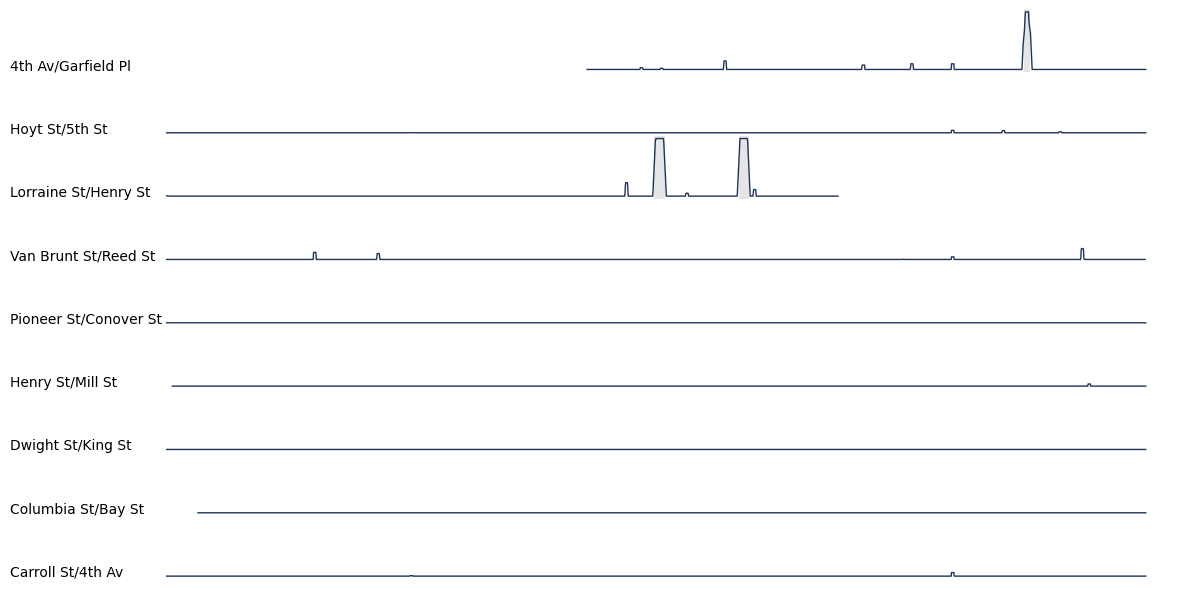

In [18]:
import seaborn as sns

# definition to group consecutive values in a list for order variable
def group_consecutive(data):
    import numpy as np
    return np.split(data, np.where(np.diff(data) != 1)[0]+1)

time_data = RH_data.groupby( ['deployment_id',pd.Grouper(key='time',freq="2H")] ).agg({
    'smooth_depth_in':'mean',
    'sensor_display_name':'first',
    }).reset_index()

time_data = time_data[ time_data['deployment_id'] != 'overly_heroic_squid' ]

time_data['smooth_depth_in'] = time_data.groupby('deployment_id').apply( lambda x: x['smooth_depth_in'].rolling(8, axis=0 ).mean() ).values
time_data = time_data.dropna( axis = 0 )
time_data = time_data[ (time_data['time'].dt.year >= 2022) & (time_data['time'].dt.month >= 3) ]

fig,axs = plt.subplots(nrows=time_data['deployment_id'].nunique(),figsize=(12,6), sharex=True, sharey=True )

for count,id in enumerate(time_data['deployment_id'].unique()):
    ax = axs[count]
    temp = time_data[time_data['deployment_id']==id].copy()

    ax.plot(
        temp['time'], 
        temp['smooth_depth_in'], 
        lw=1 , zorder=count+1,
        color = '#1d3557')

    ax.set_ylabel( temp['sensor_display_name'].values[0].split(" - ")[1] , rotation=0, ha='left')
    # move the y label to the left
    ax.yaxis.set_label_coords(-0.1,0)
    sns.despine( bottom = True, left = True, right=True, ax=ax )
    ax.patch.set_alpha(0)

    #remove xticks
    ax.set_xticks([])
    ax.set_yticks([])

    temp['order'] = [i for i in range(temp.shape[0])]
    temp_filtered = temp[ temp['smooth_depth_in'] > 0.5 ]
    
    grouped_floods = group_consecutive( temp_filtered['order'] ) 
    for flood in grouped_floods:
        if len(flood.values) > 8:
            flood_start = flood.values[0]
            flood_end = flood.values[-1]

            flood_start_time = temp[temp['order']==flood_start]['time'].values[0]
            flood_end_time = temp[temp['order']==flood_end]['time'].values[0]
            
            ax.axvspan(flood_start_time, flood_end_time, alpha=0.2, fc='grey', ec=None, zorder=0)


plt.tight_layout( h_pad= 0 , w_pad=0 )
plt.show()
